<a href="https://colab.research.google.com/github/mohammad0alfares/MachineLearningNotebooks/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [0]:
df

In [4]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(model.coef_) ## print the coefficients
print(model.intercept_) ## print the intercept

[  -19.26205673  -232.28062651   513.84509018   349.56473264
 -1197.06623235   847.45993639   221.27144207   129.65465039
   905.8624391     70.03754313]
152.84918566808608


Text(0, 0.5, 'Predictions')

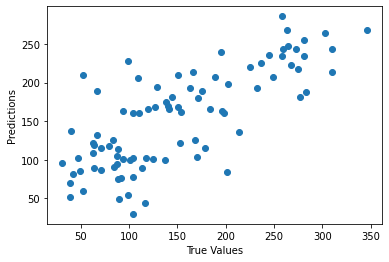

In [6]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [7]:
print ('Score:', model.score(X_test, y_test))


Score: 0.5725717526898881


# Validation

*   train/test split
*   cross validation (very similar to train/test split, but it’s applied to more subsets)

# Cross Validation

1.  K-Folds Cross Validation 
2.  Leave One Out Cross Validation (LOOCV) 




In [16]:
from sklearn.model_selection import KFold # import KFold
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 


KFold(n_splits=2, random_state=None, shuffle=False)


In [17]:
print(X)
for train_index, test_index in kf.split(X):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


[[1 2]
 [3 4]
 [1 2]
 [3 4]]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
